In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer
import re
import os
from optparse import OptionParser
# import config
# from utils import time_utils
from time import time
import re
import csv
import os
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords


In [16]:
f = '/Users/liuchang/Desktop/15-688/Homework/Task14 -big data/'
os.chdir(f)

In [108]:
df_attr_bullets = pd.read_csv('data/df_attribute_bullets_processed.csv', encoding="ISO-8859-1")
df_all = pd.read_csv('data/df_all_processed.csv', encoding = "ISO-8859-1")

In [109]:
print(len(df_all))
df_all.head()

240760


,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed
0,2,simpson strong tie 12 gauge angle,100001,3.00,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...
1,3,simpson strong tie 12 gauge angle,100001,2.50,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3.00,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...


In [97]:
print(len(df_attr_bullets))
df_attr_bullets.head()

86263


,attribute_bullets,product_uid,attribute_bullets_stemmed
0,Versatile connector for various 90ÃÂ° connect...,100001,versatil connector for various 90Ã¢Â° connect ...
1,"Revives wood and composite decks, railings, po...",100002,"reviv wood and composit decks, railings, porch..."
2,Slightly narrower for tighter spaces. Designed...,100003,slight narrow for tighter spaces. design with ...
3,Positive power tolerance (0 to +5-Watt). Anti-...,100004,posit power toler (0 to +5-watt). anti-reflect...
4,"Includes the trim kit only, the rough-in kit (...",100005,"includ the trim kit only, the rough-in kit (r1..."


In [110]:
df_all = pd.merge(df_all, df_attr_bullets, how='left', on='product_uid')

In [112]:
df1 = pd.read_csv('data/df_all_with_tfidf_w2v.csv', encoding="ISO-8859-1")
df1.head()

,id,product_uid,relevance,dist_in_title,dist_in_desc,tfidf_cos_sim_in_title,tfidf_cos_sim_in_desc,w2v_cos_sim_in_title,w2v_cos_sim_in_desc
0,2,100001,3.00,0.190476,0.030418,-3.689349e+19,-3.689349e+19,0.452280,0.384297
1,3,100001,2.50,0.153846,0.022901,0.000000e+00,0.000000e+00,0.381210,0.097337
2,9,100002,3.00,0.175000,0.017875,0.000000e+00,3.689349e+19,0.000000,0.458450
3,16,100005,2.33,0.326087,0.048632,-3.689349e+19,1.084202e-19,0.539390,0.000000
4,17,100005,2.67,0.382979,0.054545,0.000000e+00,-2.000000e+00,0.725487,0.000000


In [113]:
df_all = pd.merge(df_all, df1, how='left', on=['id','product_uid','relevance'])

In [114]:
print(len(df_all))
df_all.head()

240760


,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed,attribute_bullets,attribute_bullets_stemmed,dist_in_title,dist_in_desc,tfidf_cos_sim_in_title,tfidf_cos_sim_in_desc,w2v_cos_sim_in_title,w2v_cos_sim_in_desc
0,2,simpson strong tie 12 gauge angle,100001,3.00,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...,Versatile connector for various 90ÃÂ° connect...,versatil connector for various 90Ã¢Â° connect ...,0.190476,0.030418,-3.689349e+19,-3.689349e+19,0.452280,0.384297
1,3,simpson strong tie 12 gauge angle,100001,2.50,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...,Versatile connector for various 90ÃÂ° connect...,versatil connector for various 90Ã¢Â° connect ...,0.153846,0.022901,0.000000e+00,0.000000e+00,0.381210,0.097337
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3.00,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...,"Revives wood and composite decks, railings, po...","reviv wood and composit decks, railings, porch...",0.175000,0.017875,0.000000e+00,3.689349e+19,0.000000,0.458450
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...,"Includes the trim kit only, the rough-in kit (...","includ the trim kit only, the rough-in kit (r1...",0.326087,0.048632,-3.689349e+19,1.084202e-19,0.539390,0.000000
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...,"Includes the trim kit only, the rough-in kit (...","includ the trim kit only, the rough-in kit (r1...",0.382979,0.054545,0.000000e+00,-2.000000e+00,0.725487,0.000000


In [116]:
for var in df_all.keys():
    df_all[var]=df_all[var].fillna("") 

### Extract feature -Some TFIDF features

In [117]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from scipy.sparse import csr_matrix

vectorizer_title =  TfidfVectorizer(stop_words='english',max_df=0.5) 
vectorizer_description =  TfidfVectorizer(stop_words='english',max_df=0.5) 
vectorizer_bullets =  TfidfVectorizer(stop_words='english',max_df=0.5) 

features_title = vectorizer_title.fit_transform(list(set(list(df_all['product_title_stemmed'])))) 
features_description = vectorizer_description.fit_transform(list(set(list(df_all['product_description_stemmed'])))) 
features_bullets = vectorizer_bullets.fit_transform(list(set(list(df_all['attribute_bullets_stemmed'])))) 

tfidf_title = vectorizer_title.transform(df_all['search_term_stemmed']) 
tfidf_description = vectorizer_description.transform(df_all['search_term_stemmed']) 
tfidf_bullets = vectorizer_bullets.transform(df_all['search_term_stemmed']) 



In [123]:
uno_title=np.ones((len(vectorizer_title.get_feature_names()),1))
uno_description=np.ones((len(vectorizer_description.get_feature_names()),1))
uno_bullets=np.ones((len(vectorizer_bullets.get_feature_names()),1))

In [124]:
let_title=np.asarray([[len(word)] for word in vectorizer_title.get_feature_names()])
let_description=np.asarray([[len(word)] for word in vectorizer_description.get_feature_names()])
let_bullets=np.asarray([[len(word)] for word in vectorizer_bullets.get_feature_names()])

df_all['tfidf_title_num']=tfidf_title.tocsr().dot(uno_title)
df_all['tfidf_description_num']=tfidf_description.tocsr().dot(uno_description)
df_all['tfidf_bullets_num']=tfidf_bullets.tocsr().dot(uno_bullets)

df_all['tfidf_title_let']=tfidf_title.tocsr().dot(let_title)
df_all['tfidf_description_let']=tfidf_description.tocsr().dot(let_description)
df_all['tfidf_bullets_let']=tfidf_bullets.tocsr().dot(let_bullets)


In [125]:
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed,...,tfidf_cos_sim_in_title,tfidf_cos_sim_in_desc,w2v_cos_sim_in_title,w2v_cos_sim_in_desc,tfidf_title_num,tfidf_description_num,tfidf_bullets_num,tfidf_title_let,tfidf_description_let,tfidf_bullets_let
0,2,simpson strong tie 12 gauge angle,100001,3,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...,...,-3.689349e+19,-3.689349e+19,0.452280,0.384297,1.414208,1.414116,1.414167,7.772458,7.802525,7.760714
1,3,simpson strong tie 12 gauge angle,100001,2.5,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...,...,0.000000e+00,0.000000e+00,0.381210,0.097337,1.000000,1.000000,1.000000,7.000000,7.000000,7.000000
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...,...,0.000000e+00,3.689349e+19,0.000000,0.458450,1.000000,1.000000,0.000000,6.000000,6.000000,0.000000
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...,...,-3.689349e+19,1.084202e-19,0.539390,0.000000,1.708941,1.719241,1.718356,7.778700,7.947487,7.969396
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...,...,0.000000e+00,-2.000000e+00,0.725487,0.000000,1.717773,1.728970,1.730944,8.954505,9.313019,9.236322


### Extract feature- Count number of similar words/letters/bigrams etc

functions

In [129]:
"""
Returns 1 if str1 (query) is found in str2, 0 otherwise.
"""    
def query_in_text(str1, str2):
    output=0
    if len(str1.split())>0:
        if str1 in str2:
             if re.search(r'\b'+str1+r'\b',str2)!=None:
                    output=1
    return output

In [131]:
"""
The function that return a bundle of count features for the pair of strings:
- number of unique words in intersection
- number of total words in intersection
- number of letters in unique words in intersection
- ratio of common words to all words in str1 (query)
- ratio of the number of letters in common words to the total number of letters in str1 (query)
Also, the common words are returned as a string.
Example:
str1 = "table with cover"
str2 = "wood cover"
the function returns (1, 1, 5, 0.3333333333333333, 0.35714285714285715, 'cover')
"""         
def str_common_word(str1, str2, minLength=1, string_only=False):
    word_list=[]
    num=0
    total_entries=0
    cnt_letters=0
    cnt_unique_letters=0
    all_num=0
    all_total_entries=0
    all_cnt_letters=0
    for word in str1.split():
         if len(word)>=minLength:
                if string_only==False or len(re.findall(r'\d+', word))==0:
                    if (' '+word+' ') in (' '+str2+' '):
                        num+=1
                        total_entries+=(' '+str2+' ').count(' '+word+' ')
                        cnt_letters+=(' '+str2+' ').count(' '+word+' ') * (len(word))
                        cnt_unique_letters+=(len(word))
                        word_list.append(word)
                all_num+=1
                all_total_entries+=1
                all_cnt_letters+=len(word)
    
    if all_num==0:
        ratio_num=0
    else:
        ratio_num=1.0*num/all_num
    
    if all_cnt_letters==0:
        ratio_letters=0
    else:
        ratio_letters=1.0*cnt_unique_letters/all_cnt_letters
                 
    return num, total_entries, cnt_unique_letters, ratio_num, ratio_letters, " ".join(word_list)

In [133]:
"""
Similar to str_common_words(), but designed specifically for digits.
"""
def str_common_digits(str1, str2):
        found=0
        found_words_only=0
        digits_in_query=list(set(re.findall(r'\d+\/\d+|\d+\.\d+|\d+', str1)))
        digits_in_text=re.findall(r'\d+\/\d+|\d+\.\d+|\d+', str2)
        len1=len(digits_in_query)
        len2=len(digits_in_text)
        for digit in digits_in_query:
                if digit in digits_in_text:
                        found+=1
                        
        if len1==0:
            ratio=0.
        else:
            ratio=found/len1
        
        if (len1 + len2)==0:
            jaccard=0.
        else:
            jaccard=1.0*found/(len1 + len2)
        return len1, len2, found, ratio, jaccard


#### query vs product title

In [132]:
df_all['query_in_title']=df_all.apply(lambda x: \
            query_in_text(x['search_term_stemmed'],x['product_title_stemmed']),axis=1)

df_all['word_in_title_tuple']=df_all.apply(lambda x: \
            str_common_word(x['search_term_stemmed'],x['product_title_stemmed']),axis=1)
df_all['word_in_title_num'] = df_all['word_in_title_tuple'].map(lambda x: x[0])
df_all['word_in_title_sum'] = df_all['word_in_title_tuple'].map(lambda x: x[1])
df_all['word_in_title_let'] = df_all['word_in_title_tuple'].map(lambda x: x[2])
df_all['word_in_title_numratio'] = df_all['word_in_title_tuple'].map(lambda x: x[3])
df_all['word_in_title_letratio'] = df_all['word_in_title_tuple'].map(lambda x: x[4])
df_all['word_in_title_string'] = df_all['word_in_title_tuple'].map(lambda x: x[5])
df_all=df_all.drop(['word_in_title_tuple'],axis=1)

df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed,...,tfidf_title_let,tfidf_description_let,tfidf_bullets_let,query_in_title,word_in_title_num,word_in_title_sum,word_in_title_let,word_in_title_numratio,word_in_title_letratio,word_in_title_string
0,2,simpson strong tie 12 gauge angle,100001,3,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...,...,7.772458,7.802525,7.760714,0,1,1,4,0.500000,0.363636,angl
1,3,simpson strong tie 12 gauge angle,100001,2.5,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...,...,7.000000,7.000000,7.000000,0,0,0,0,0.000000,0.000000,
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...,...,6.000000,6.000000,0.000000,1,1,1,6,1.000000,1.000000,deckov
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...,...,7.778700,7.947487,7.969396,0,1,1,6,0.333333,0.428571,shower
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...,...,8.954505,9.313019,9.236322,1,3,3,16,1.000000,1.000000,shower onli faucet


In [134]:
df_all['common_digits_in_title_tuple']=df_all.apply(lambda x: \
            str_common_digits(x['search_term_stemmed'],x['product_title_stemmed']),axis=1)
df_all['len_of_digits_in_query'] = df_all['common_digits_in_title_tuple'].map(lambda x: x[0])
df_all['len_of_digits_in_title'] = df_all['common_digits_in_title_tuple'].map(lambda x: x[1])
df_all['common_digits_in_title_num'] = df_all['common_digits_in_title_tuple'].map(lambda x: x[2])
df_all['common_digits_in_title_ratio'] = df_all['common_digits_in_title_tuple'].map(lambda x: x[3])
df_all['common_digits_in_title_jaccard'] = df_all['common_digits_in_title_tuple'].map(lambda x: x[4])
df_all=df_all.drop(['common_digits_in_title_tuple'],axis=1)
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed,...,word_in_title_sum,word_in_title_let,word_in_title_numratio,word_in_title_letratio,word_in_title_string,len_of_digits_in_query,len_of_digits_in_title,common_digits_in_title_num,common_digits_in_title_ratio,common_digits_in_title_jaccard
0,2,simpson strong tie 12 gauge angle,100001,3,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...,...,1,4,0.500000,0.363636,angl,0,1,0,0.0,0.0
1,3,simpson strong tie 12 gauge angle,100001,2.5,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...,...,0,0,0.000000,0.000000,,0,1,0,0.0,0.0
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...,...,1,6,1.000000,1.000000,deckov,0,2,0,0.0,0.0
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...,...,1,6,0.333333,0.428571,shower,0,1,0,0.0,0.0
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...,...,3,16,1.000000,1.000000,shower onli faucet,0,1,0,0.0,0.0


#### query vs product description

In [135]:

df_all['word_in_description_tuple']=df_all.apply(lambda x: \
            str_common_word(x['search_term_stemmed'],x['product_description_stemmed']),axis=1)
df_all['word_in_description_num'] = df_all['word_in_description_tuple'].map(lambda x: x[0])
df_all['word_in_description_sum'] = df_all['word_in_description_tuple'].map(lambda x: x[1])
df_all['word_in_description_let'] = df_all['word_in_description_tuple'].map(lambda x: x[2])
df_all['word_in_description_numratio'] = df_all['word_in_description_tuple'].map(lambda x: x[3])
df_all['word_in_description_letratio'] = df_all['word_in_description_tuple'].map(lambda x: x[4])
df_all['word_in_description_string'] = df_all['word_in_description_tuple'].map(lambda x: x[5])
df_all=df_all.drop(['word_in_description_tuple'],axis=1)

df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed,...,len_of_digits_in_title,common_digits_in_title_num,common_digits_in_title_ratio,common_digits_in_title_jaccard,word_in_description_num,word_in_description_sum,word_in_description_let,word_in_description_numratio,word_in_description_letratio,word_in_description_string
0,2,simpson strong tie 12 gauge angle,100001,3,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...,...,1,0,0.0,0.0,1,3,4,0.500000,0.363636,angl
1,3,simpson strong tie 12 gauge angle,100001,2.5,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...,...,1,0,0.0,0.0,0,0,0,0.000000,0.000000,
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...,...,2,0,0.0,0.0,1,1,6,1.000000,1.000000,deckov
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...,...,1,0,0.0,0.0,1,1,6,0.333333,0.428571,shower
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...,...,1,0,0.0,0.0,2,2,12,0.666667,0.750000,shower faucet


In [136]:
df_all['common_digits_in_description_tuple']=df_all.apply(lambda x: \
            str_common_digits(x['search_term_stemmed'],x['product_description_stemmed']),axis=1)
df_all['len_of_digits_in_query'] = df_all['common_digits_in_description_tuple'].map(lambda x: x[0])
df_all['len_of_digits_in_description'] = df_all['common_digits_in_description_tuple'].map(lambda x: x[1])
df_all['common_digits_in_description_num'] = df_all['common_digits_in_description_tuple'].map(lambda x: x[2])
df_all['common_digits_in_description_ratio'] = df_all['common_digits_in_description_tuple'].map(lambda x: x[3])
df_all['common_digits_in_description_jaccard'] = df_all['common_digits_in_description_tuple'].map(lambda x: x[4])
df_all=df_all.drop(['common_digits_in_description_tuple'],axis=1)
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed,...,word_in_description_num,word_in_description_sum,word_in_description_let,word_in_description_numratio,word_in_description_letratio,word_in_description_string,len_of_digits_in_description,common_digits_in_description_num,common_digits_in_description_ratio,common_digits_in_description_jaccard
0,2,simpson strong tie 12 gauge angle,100001,3,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...,...,1,3,4,0.500000,0.363636,angl,9,0,0.0,0.0
1,3,simpson strong tie 12 gauge angle,100001,2.5,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...,...,0,0,0,0.000000,0.000000,,9,0,0.0,0.0
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...,...,1,1,6,1.000000,1.000000,deckov,6,0,0.0,0.0
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...,...,1,1,6,0.333333,0.428571,shower,2,0,0.0,0.0
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...,...,2,2,12,0.666667,0.750000,shower faucet,2,0,0.0,0.0


## all features

In [152]:
df_all.columns

Index(['id', 'product_title', 'product_uid', 'relevance', 'search_term',
       'product_description', 'product_brand', 'product_title_stemmed',
       'search_term_stemmed', 'product_description_stemmed',
       'attribute_bullets', 'attribute_bullets_stemmed', 'dist_in_title',
       'dist_in_desc', 'tfidf_cos_sim_in_title', 'tfidf_cos_sim_in_desc',
       'w2v_cos_sim_in_title', 'w2v_cos_sim_in_desc', 'tfidf_title_num',
       'tfidf_description_num', 'tfidf_bullets_num', 'tfidf_title_let',
       'tfidf_description_let', 'tfidf_bullets_let', 'query_in_title',
       'word_in_title_num', 'word_in_title_sum', 'word_in_title_let',
       'word_in_title_numratio', 'word_in_title_letratio',
       'word_in_title_string', 'len_of_digits_in_query',
       'len_of_digits_in_title', 'common_digits_in_title_num',
       'common_digits_in_title_ratio', 'common_digits_in_title_jaccard',
       'word_in_description_num', 'word_in_description_sum',
       'word_in_description_let', 'word_in_desc

In [145]:
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed,...,word_in_description_sum,word_in_description_let,word_in_description_numratio,word_in_description_letratio,word_in_description_string,len_of_digits_in_description,common_digits_in_description_num,common_digits_in_description_ratio,common_digits_in_description_jaccard,initial_len_of_query
0,2,simpson strong tie 12 gauge angle,100001,3,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...,...,3,4,0.500000,0.363636,angl,9,0,0.0,0.0,2
1,3,simpson strong tie 12 gauge angle,100001,2.5,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...,...,0,0,0.000000,0.000000,,9,0,0.0,0.0,2
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...,...,1,6,1.000000,1.000000,deckov,6,0,0.0,0.0,1
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...,...,1,6,0.333333,0.428571,shower,2,0,0.0,0.0,3
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...,...,2,12,0.666667,0.750000,shower faucet,2,0,0.0,0.0,3


In [150]:
df_all.to_csv('data/df_all_with_35_features.csv', sep=',', encoding='utf-8', index=False)

### Basic text features

Calculated here are basic text features:
* number of words/digits
* average length of word
* average length of word
* number/length of brands/materials
* percentage of digits

In [140]:
df_all['initial_len_of_query'] = df_all['search_term_stemmed'].map(lambda x:len(x.split())).astype(np.int64)

In [141]:
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed,...,word_in_description_sum,word_in_description_let,word_in_description_numratio,word_in_description_letratio,word_in_description_string,len_of_digits_in_description,common_digits_in_description_num,common_digits_in_description_ratio,common_digits_in_description_jaccard,initial_len_of_query
0,2,simpson strong tie 12 gauge angle,100001,3,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...,...,3,4,0.500000,0.363636,angl,9,0,0.0,0.0,2
1,3,simpson strong tie 12 gauge angle,100001,2.5,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...,...,0,0,0.000000,0.000000,,9,0,0.0,0.0,2
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...,...,1,6,1.000000,1.000000,deckov,6,0,0.0,0.0,1
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...,...,1,6,0.333333,0.428571,shower,2,0,0.0,0.0,3
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...,...,2,12,0.666667,0.750000,shower faucet,2,0,0.0,0.0,3


后面的目前还没有用

In [69]:
for var in df_all.keys():
    df_all[var]=df_all[var].fillna("") 

### the function returns text after a specific word
### for example, extract_after_word('faucets for kitchen') 
### will return 'kitchen'
def extract_after_word(s,word):
    output=""
    if word in s:
        srch= re.search(r'(?<=\b'+word+'\ )[a-zA-Z0-9\n\ \%\$\-\#\@\&\/\.\'\*\(\)\,]+',s)
        if srch!=None:
            output=srch.group(0)
    return output

### get 'for' and 'with' parts from query and 'without' from product title
df_all['search_term_for']=df_all['search_term'].map(lambda x: extract_after_word(x,'for'))

df_all['search_term_with']=df_all['search_term'].map(lambda x: extract_after_word(x,'with'))

df_all['product_title_parsed_without']=df_all['product_title'].map(lambda x: extract_after_word(x,'without'))
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,attribute_bullets,attribute_bullets_stemmed,search_term_for,search_term_with,product_title_parsed_without
0,2,simpson strong-ti 12-gaug angl,100001,3,angl bracket,"Not only do angles make joints stronger, they ...",Versatile connector for various 90Â° connectio...,versatil connector for various 90â° connect an...,,,
1,3,simpson strong-ti 12-gaug angl,100001,2.5,l bracket,"Not only do angles make joints stronger, they ...",Versatile connector for various 90Â° connectio...,versatil connector for various 90â° connect an...,,,
2,9,behr premium textur deckov 1-gal. #sc-141 tugb...,100002,3,deck over,BEHR Premium Textured DECKOVER is an innovativ...,"Revives wood and composite decks, railings, po...","reviv wood and composit decks, railings, porch...",,,
3,16,delta vero 1-handl shower onli faucet trim kit...,100005,2.33,rain shower head,Update your bathroom with the Delta Vero Singl...,"Includes the trim kit only, the rough-in kit (...","includ the trim kit only, the rough-in kit (r1...",,,
4,17,delta vero 1-handl shower onli faucet trim kit...,100005,2.67,shower onli faucet,Update your bathroom with the Delta Vero Singl...,"Includes the trim kit only, the rough-in kit (...","includ the trim kit only, the rough-in kit (r1...",,,


### Query expansion

## PROCESS ATTRIBUTES BULLETS

In [32]:
df_attr = pd.read_csv('data/attributes.csv', encoding="ISO-8859-1")
print(len(df_attr))
df_attr.head()

2044803


,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90Â° connectio...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [33]:
len(df_attr['product_uid'])

2044803

In [36]:
t0 = time()
df_attr['product_uid']=df_attr['product_uid'].fillna(0)
df_attr['value']=df_attr['value'].fillna("")
df_attr['name']=df_attr['name'].fillna("")
dict_attr={}
for product_uid in list(set(list(df_attr['product_uid']))):
    dict_attr[int(product_uid)]={'product_uid':int(product_uid),'attribute_bullets':[]}

for i in range(0,len(df_attr['product_uid'])):
    if (i % 100000)==0:
        print("Read",i,"out of", len(df_attr['product_uid']), "rows in attributes.csv in", round((time()-t0)/60,1) ,'minutes')
    if df_attr['name'][i][0:6]=="Bullet":
        dict_attr[int(df_attr['product_uid'][i])]['attribute_bullets'].append(df_attr['value'][i])

if 0 in dict_attr.keys():
    del(dict_attr[0])
                        
for item in dict_attr.keys():
    if len(dict_attr[item]['attribute_bullets'])>0:
        dict_attr[item]['attribute_bullets']=". ".join(dict_attr[item]['attribute_bullets'])
        dict_attr[item]['attribute_bullets']+="."
    else:
        dict_attr[item]['attribute_bullets']=""

Read 0 out of 2044803 rows in attributes.csv in 0.0 minutes
Read 100000 out of 2044803 rows in attributes.csv in 0.1 minutes
Read 200000 out of 2044803 rows in attributes.csv in 0.1 minutes
Read 300000 out of 2044803 rows in attributes.csv in 0.1 minutes
Read 400000 out of 2044803 rows in attributes.csv in 0.2 minutes
Read 500000 out of 2044803 rows in attributes.csv in 0.2 minutes
Read 600000 out of 2044803 rows in attributes.csv in 0.3 minutes
Read 700000 out of 2044803 rows in attributes.csv in 0.3 minutes
Read 800000 out of 2044803 rows in attributes.csv in 0.4 minutes
Read 900000 out of 2044803 rows in attributes.csv in 0.4 minutes
Read 1000000 out of 2044803 rows in attributes.csv in 0.5 minutes
Read 1100000 out of 2044803 rows in attributes.csv in 0.5 minutes
Read 1200000 out of 2044803 rows in attributes.csv in 0.6 minutes
Read 1300000 out of 2044803 rows in attributes.csv in 0.6 minutes
Read 1400000 out of 2044803 rows in attributes.csv in 0.7 minutes
Read 1500000 out of 20448

Example output of **dict_attr**
```json
{
131074: {'attribute_bullets': 'Treats up to 240 gallons for use with all 2-cycle and 4-cycle engines. Protects all engine components from corrosion and varnish build-up caused by ethanol blended fuels to keep your engine starting and running easily all year. Envelopes water so it passes safely through the fuel system and does not bond with ethanol, avoiding the corrosive effects of ethanol blended fuels. EPA registered, including automobile use.',
  'product_uid': 131074},
131077: {'attribute_bullets': "4 in. outside diameter and 3-3/8 in. from hole to hole. Screw-in style grid covers 4 in. shower drain hole. Two finish-matched screws included for convenient installation. Comparable to select Plastic Oddities brand grid strainers. Sophisticated oil rubbed bronze finish. Brass construction ensures long-lasting functionality. Do not use plumber's putty for installation.",
  'product_uid': 131077}
  ...
}
```

In [57]:
t0 = time()
df_attr_bullets=pd.DataFrame(dict_attr).transpose()
df_attr_bullets['attribute_bullets']=df_attr_bullets['attribute_bullets'].map(lambda x: x.replace("..",".").encode('utf-8'))
df_attr_bullets['attribute_bullets'] = df_attr_bullets['attribute_bullets'].str.decode("utf-8")
print('create attributes bullets time:',round((time()-t0)/60,1) ,'minutes\n')
print(len(df_attr_bullets.product_uid))
df_attr_bullets.head()


create attributes bullets time: 0.1 minutes

86263


,attribute_bullets,product_uid
100001,Versatile connector for various 90Â° connectio...,100001
100002,"Revives wood and composite decks, railings, po...",100002
100003,Slightly narrower for tighter spaces. Designed...,100003
100004,Positive power tolerance (0 to +5-Watt). Anti-...,100004
100005,"Includes the trim kit only, the rough-in kit (...",100005


In [58]:
df_attr_bullets.dtypes

attribute_bullets    object
product_uid          object
dtype: object

In [59]:
stemmer = SnowballStemmer('english')
#把每一列中的每一条产品说明中的英文句子，小写lower() -> 分割split() -> 提取词干stemmer.stem -> 整合join
def str_stemmer(s):
#     print(s)
#     print(type(s))
    return " ".join([stemmer.stem(word) for word in s.lower().split()])
t0 = time()

df_attr_bullets['attribute_bullets_stemmed'] = df_attr_bullets['attribute_bullets'].map(lambda x: str_stemmer(x))
print('attribute bullets parsing time:',round((time()-t0)/60,1) ,'minutes\n')

attribute bullets parsing time: 1.2 minutes



In [60]:
df_attr_bullets.head()

,attribute_bullets,product_uid,attribute_bullets_stemmed
100001,Versatile connector for various 90Â° connectio...,100001,versatil connector for various 90â° connect an...
100002,"Revives wood and composite decks, railings, po...",100002,"reviv wood and composit decks, railings, porch..."
100003,Slightly narrower for tighter spaces. Designed...,100003,slight narrow for tighter spaces. design with ...
100004,Positive power tolerance (0 to +5-Watt). Anti-...,100004,posit power toler (0 to +5-watt). anti-reflect...
100005,"Includes the trim kit only, the rough-in kit (...",100005,"includ the trim kit only, the rough-in kit (r1..."


In [62]:
df_attr_bullets.to_csv("df_attribute_bullets_processed.csv", index=False)

In [91]:
dfff = pd.read_csv('data/df_attribute_bullets_processed.csv', encoding="ISO-8859-1")
dfff.head()

,attribute_bullets,product_uid,attribute_bullets_stemmed
0,Versatile connector for various 90ÃÂ° connect...,100001,versatil connector for various 90Ã¢Â° connect ...
1,"Revives wood and composite decks, railings, po...",100002,"reviv wood and composit decks, railings, porch..."
2,Slightly narrower for tighter spaces. Designed...,100003,slight narrow for tighter spaces. design with ...
3,Positive power tolerance (0 to +5-Watt). Anti-...,100004,posit power toler (0 to +5-watt). anti-reflect...
4,"Includes the trim kit only, the rough-in kit (...",100005,"includ the trim kit only, the rough-in kit (r1..."


In [92]:
len(dfff.product_uid)

86263

### add some text processing

**This part is used for some feature extraction, not used in current version**

In [144]:
# remove stop words
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
stoplist.append('till')
stoplist.remove('can')
def str_stemmer_wo_parser(s, stoplist=stoplist):
    s=" ".join([word for word in s.split() if word not in stoplist])
    return " ".join([stemmer.stem(re.sub('\.(?=$)', '', word)) for word in s.split()])


In [ ]:
### Transform tags into text, it may look like unecessary step.
### But in our work we have to frequently save processing results and recover tags from text.
### Here this transformation is used to make the _tokens variables compatibe with 
### parser_mystr2tuple() function 
df_all['search_term_cut_tokens']=df_all['search_term_cut_tokens'].map(lambda x: str(x))
df_all['search_term_cut_wordtokens']=df_all['search_term_cut_wordtokens'].map(lambda x: str(x))
df_all['product_title_cut_tokens']=df_all['product_title_cut_tokens'].map(lambda x: str(x))
df_all['product_title_cut_wordtokens']=df_all['product_title_cut_wordtokens'].map(lambda x: str(x))

df_all['search_term_keys']=df_all.apply(lambda x: \
            get_key_words(parser_mystr2tuple(x['search_term_cut_tokens']),parser_mystr2tuple(x['search_term_cut_wordtokens']),string_output=True),axis=1)
df_all['product_title_keys']=df_all.apply(lambda x: \
            get_key_words(parser_mystr2tuple(x['product_title_cut_tokens']),parser_mystr2tuple(x['product_title_cut_wordtokens']),string_output=True),axis=1)


In [ ]:
### get trigram from query
df_all['search_term_thekey_tuple']=df_all.apply(lambda x: \
            get_last_words_from_parsed_query(x['search_term_keys'],x['product_title_thekey']),axis=1)
#df_all['thekey_info']=df_all['search_term_keys']+"\t"+df_all['product_title_thekey']
#df_all['search_term_thekey_tuple']=df_all['thekey_info'].map(lambda x: get_last_words_from_parsed_query(x.split("\t")[0],x.split("\t")[1]))
df_all['search_term_thekey']=df_all['search_term_thekey_tuple'].map(lambda x: x[0])
df_all['search_term_beforethekey']=df_all['search_term_thekey_tuple'].map(lambda x: x[1])
df_all['search_term_before2thekey']=df_all['search_term_thekey_tuple'].map(lambda x: x[2])
df_all=df_all.drop(['search_term_thekey_tuple'],axis=1)

In [ ]:
df_all['search_term_thekey_stemmed']=df_all['search_term_thekey'].map(lambda x: str_stemmer_wo_parser(x,stoplist=stoplist_wo_can))
df_all['product_title_thekey_stemmed']=df_all['product_title_thekey'].map(lambda x: str_stemmer_wo_parser(x,stoplist=stoplist_wo_can))
df_all['search_term_beforethekey_stemmed']=df_all['search_term_beforethekey'].map(lambda x: str_stemmer_wo_parser(x,stoplist=stoplist_wo_can))
df_all['product_title_beforethekey_stemmed']=df_all['product_title_beforethekey'].map(lambda x: str_stemmer_wo_parser(x,stoplist=stoplist_wo_can))
df_all['search_term_before2thekey_stemmed']=df_all['search_term_before2thekey'].map(lambda x: str_stemmer_wo_parser(x,stoplist=stoplist_wo_can))
df_all['product_title_before2thekey_stemmed']=df_all['product_title_before2thekey'].map(lambda x: str_stemmer_wo_parser(x,stoplist=stoplist_wo_can))

## test model

In [162]:
dff = pd.read_csv('data/df_all_with_35_features.csv', encoding="ISO-8859-1")
dff.head()

/Users/liuchang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,product_title,product_uid,relevance,search_term,product_description,product_brand,product_title_stemmed,search_term_stemmed,product_description_stemmed,...,word_in_description_sum,word_in_description_let,word_in_description_numratio,word_in_description_letratio,word_in_description_string,len_of_digits_in_description,common_digits_in_description_num,common_digits_in_description_ratio,common_digits_in_description_jaccard,initial_len_of_query
0,2,simpson strong tie 12 gauge angle,100001,3.00,angle bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,angl bracket,not onli do angl make joint stronger. they als...,...,3,4,0.500000,0.363636,angl,9,0,0.0,0.0,2
1,3,simpson strong tie 12 gauge angle,100001,2.50,l bracket,not only do angles make joints stronger. they ...,simpson,simpson strong tie 12 gaug angl,l bracket,not onli do angl make joint stronger. they als...,...,0,0,0.000000,0.000000,NaN,9,0,0.0,0.0,2
2,9,behr premium textured deckover 1 gal. sc 141 t...,100002,3.00,deckover,behr premium textured deckover is an innovativ...,behr,behr premium textur deckov 1 gal. sc 141 tugbo...,deckov,behr premium textur deckov is an innov solid c...,...,1,6,1.000000,1.000000,deckov,6,0,0.0,0.0,1
3,16,delta vero 1 handle shower only faucet trim ki...,100005,2.33,rain shower head,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,rain shower head,updat your bathroom with the delta vero singl ...,...,1,6,0.333333,0.428571,shower,2,0,0.0,0.0,3
4,17,delta vero 1 handle shower only faucet trim ki...,100005,2.67,shower only faucet,update your bathroom with the delta vero singl...,delta,delta vero 1 handl shower onli faucet trim kit...,shower onli faucet,updat your bathroom with the delta vero singl ...,...,2,12,0.666667,0.750000,shower faucet,2,0,0.0,0.0,3


In [163]:
df1 = dff[['id','relevance','dist_in_title','dist_in_desc','common_digits_in_title_ratio','tfidf_title_let', 'initial_len_of_query','word_in_title_letratio','word_in_description_letratio']]

In [164]:
print(len(df1.id))
df1.head()

240760


,id,relevance,dist_in_title,dist_in_desc,common_digits_in_title_ratio,tfidf_title_let,initial_len_of_query,word_in_title_letratio,word_in_description_letratio
0,2,3.00,0.190476,0.030418,0.0,7.772458,2,0.363636,0.363636
1,3,2.50,0.153846,0.022901,0.0,7.000000,2,0.000000,0.000000
2,9,3.00,0.175000,0.017875,0.0,6.000000,1,1.000000,1.000000
3,16,2.33,0.326087,0.048632,0.0,7.778700,3,0.428571,0.428571
4,17,2.67,0.382979,0.054545,0.0,8.954505,3,1.000000,0.750000


In [165]:
################4) 把之前合并起来处理的训练集，测试集拿出来
#分离训练集合，测试集合
df_test = df1.loc[pd.isnull(df1['relevance'])]
df_train = df1.loc[pd.notnull(df1['relevance'])]
# df_train = df_all.loc[df_train.index]
# df_test = df_all.loc[df_test.index]
#记录测试ID
test_ids = df_test['id']
#分离出y_train
y_train = df_train['relevance'].values
#删除原集label
X_train = df_train.drop(['id', 'relevance'], axis=1).values
X_test = df_test.drop(['id', 'relevance'], axis = 1).values

In [166]:
df_test.head()

,id,relevance,dist_in_title,dist_in_desc,common_digits_in_title_ratio,tfidf_title_let,initial_len_of_query,word_in_title_letratio,word_in_description_letratio
74067,1,NaN,0.173913,0.035309,0.0,8.049256,3,0.000000,0.142857
74068,4,NaN,0.222222,0.037879,0.0,8.594285,3,0.000000,0.000000
74069,5,NaN,0.577778,0.037879,0.0,7.000000,3,0.538462,0.538462
74070,6,NaN,0.666667,0.045283,0.0,9.295986,3,1.000000,1.000000
74071,7,NaN,0.618182,0.054863,0.0,9.295986,4,0.727273,0.727273


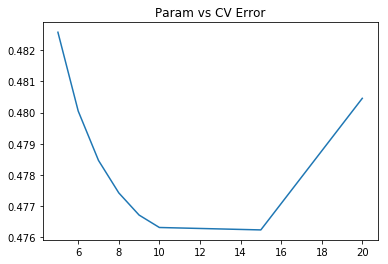

In [167]:
################5) 建立模型 : RF  # 7 features
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#循环测试不同的树的深度
params = [5,6,7,8,9,10,15,20]
test_scores = []
for param in params:
    clf = RandomForestRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
#画图
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("Param vs CV Error");

#这里会得到一个最佳的树深度

In [ ]:
################6) 上传结果
rf = RandomForestRegressor(n_estimators=30, max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
pd.DataFrame({"id": test_ids, "relevance": y_pred}).to_csv('submission.csv',index=False)